# Problem 4

In [48]:
import networkx as nx 
import numpy as np 
import matplotlib.pyplot as plt
import random as rd

## Part a

Node Degrees
[54, 3, 8, 13, 6, 1, 17, 4, 6, 6, 9, 5, 1, 6, 4, 1, 2, 10, 4, 1, 2, 3, 2, 6, 10, 1, 2, 1, 1, 1, 2, 4, 1, 5, 3, 2, 1, 5, 1, 2, 4, 4, 1, 4, 1, 3, 8, 3, 1, 2, 1, 2, 1, 5, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 4, 2, 2, 1, 1, 3, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 1, 3, 1, 2, 3, 3, 1, 1, 1, 9, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 2, 1, 4, 1, 1, 1, 2, 2, 1, 4, 4, 1, 4, 1, 1, 1, 2, 1, 5, 1, 3, 1, 2, 2, 4, 1, 1, 1, 2, 1, 1, 1, 2, 2, 3, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


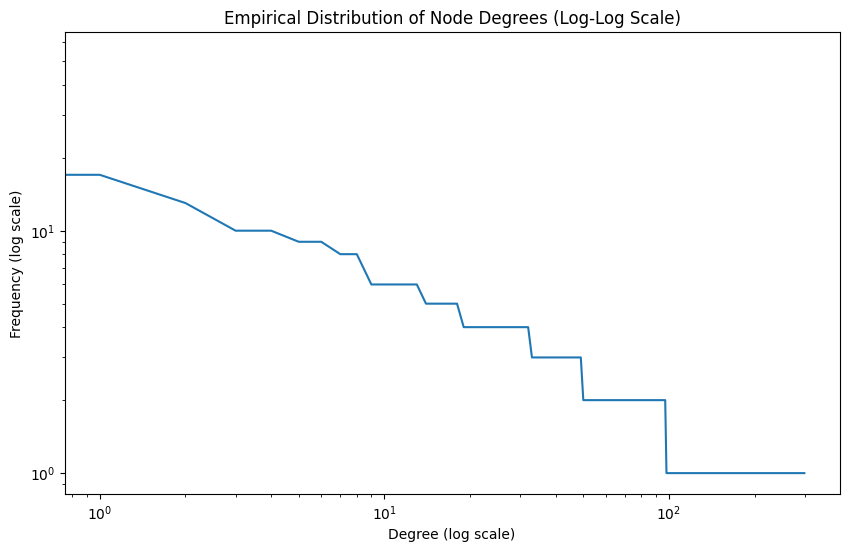

In [49]:
T = 300

G: nx.Graph = nx.Graph()
G.add_node(0)
G.add_node(1)
G.add_edge(0, 1)

for t in range(2, T): 
    probs = np.zeros(G.number_of_nodes())
    node_degrees = dict(G.degree)
    total_degree = sum(node_degrees.values())
    probs = [node_degrees[node] / total_degree for node in G]
    neighbor = rd.choices(np.asarray(G), weights=probs, k=1)[0]
    G.add_node(t)
    G.add_edge(t, neighbor)

node_degrees = dict(G.degree)

# Node Degrees
print("Node Degrees")
print(list(node_degrees.values()))

# CCDF Empirical Distribution
plt.figure(figsize=(10, 6))
plt.loglog(sorted(node_degrees.values(), reverse=True))
plt.title("Empirical Distribution of Node Degrees (Log-Log Scale)")
plt.xlabel("Degree (log scale)")
plt.ylabel("Frequency (log scale)")
plt.show()

The CCDF appears linear on a log-log scale. The changes in the degree frequency change more drastically as the degree increases. This is likely since the number of cells with a higher degree decreases dramatically for higher degrees, since only a few cells would become central in the graph, with only one being the most prefered for extremely large datasets. The linear degree distribution on a log-log scale is expected, since the degree distribution should follow a heavy-tail distribution. 

## Part b

In [50]:
v = [node for node, deg in G.degree for _ in range(deg)]
np.random.shuffle(v)

G2 = G.copy()
G2.clear_edges()
for i in range(0, len(v), 2): 
    G2.add_edge(v[i], v[i+1])

## Part C

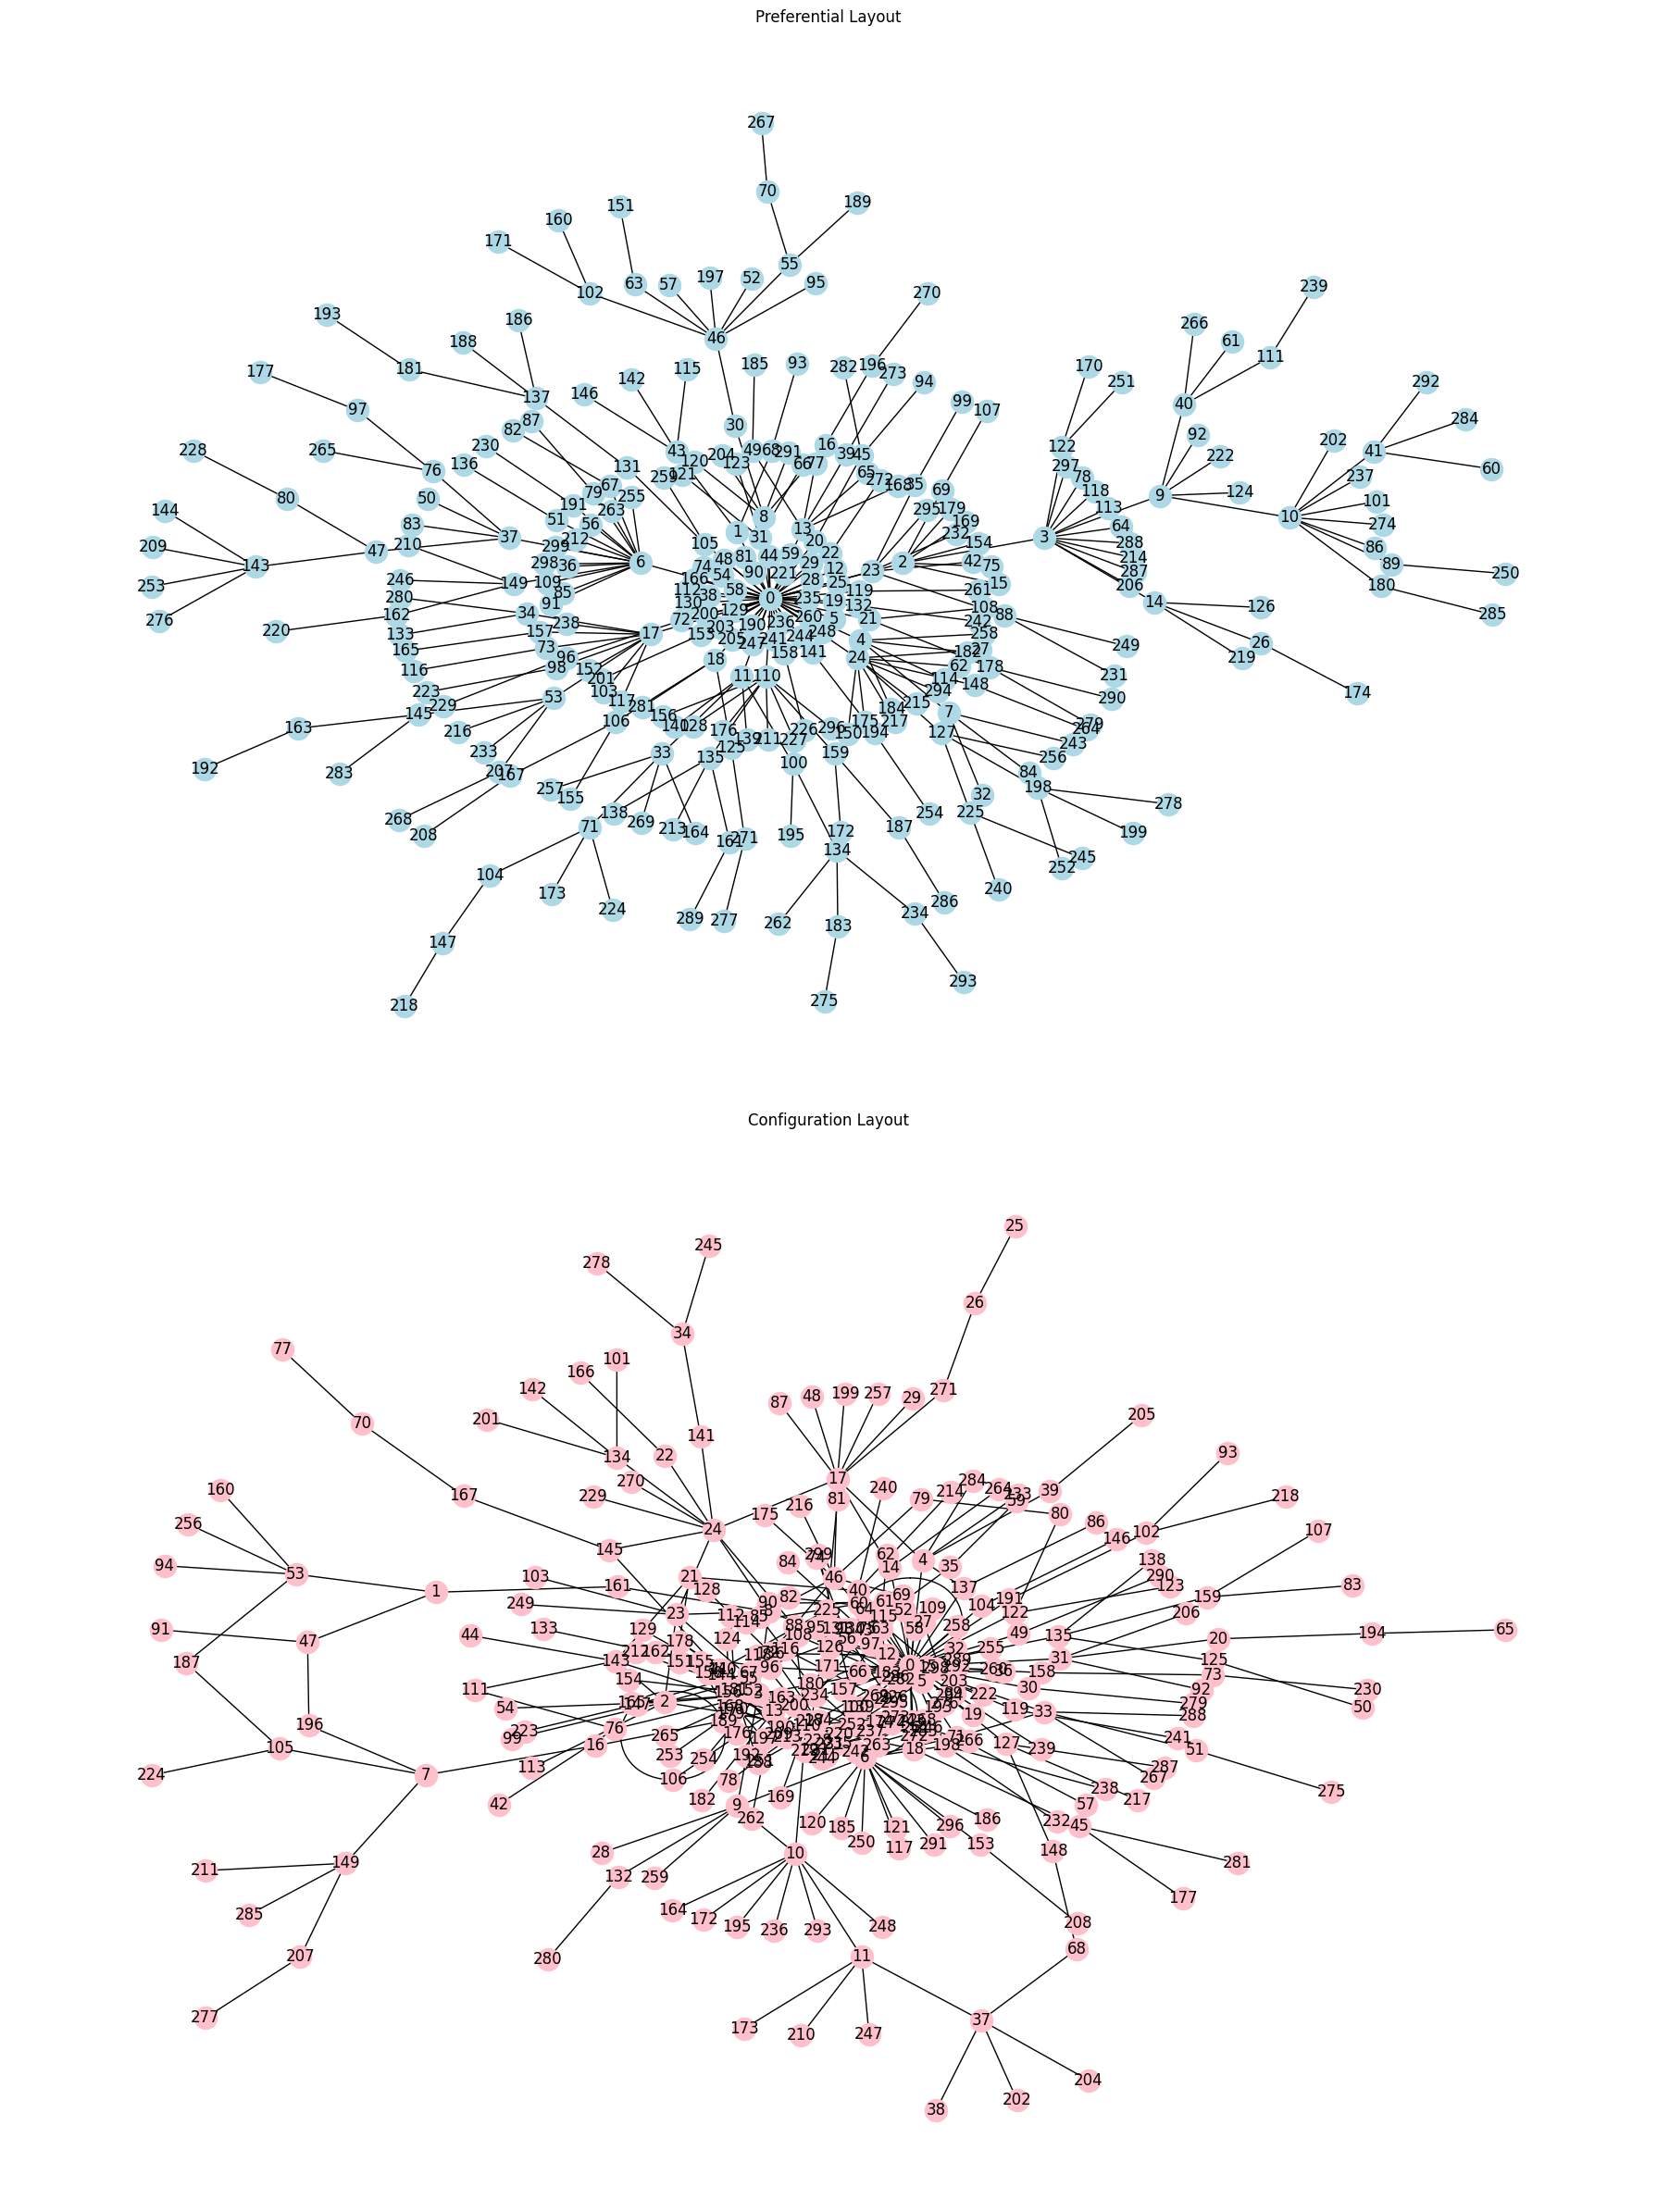

In [51]:
fig, axes = plt.subplots(2, 1, figsize=(18, 24))

# Draw G on the first subplot
ax1 = axes[0]
ax1.set_title('Preferential Layout')
nx.draw(G, pos=nx.kamada_kawai_layout(G), ax=ax1, with_labels=True, node_color="lightblue")

# Draw G2 on the second subplot
ax2 = axes[1]
ax2.set_title('Configuration Layout')
nx.draw(G2, pos=nx.kamada_kawai_layout(G2), ax=ax2, with_labels=True, node_color="pink")

plt.tight_layout()
plt.show()

One notable difference between the preferential model and the configuration model is that the preferential graph is a tree whereas the configuration graph contains cycles. Nodes in the configuration layout that had a high degree in the preferential model are also likely to have edges that map to themselves, since there is a chance that it is placed adjacent to itself in the shuffled $v$. Another interesting facet of the preferential model is that if we identify every path outwards from the first node (0), each path will follow nodes in an order that is strictly increasing in node values. The configuration model also has a section that becomes extremely clustered, which is likely the result of the few nodes with very high-degrees connecting to many nodes in the network. 